<a href="https://colab.research.google.com/github/Nub-T/Noob_Computation/blob/main/TimeSeries_ARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coded by : Andi-Nov

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [4]:
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [5]:
yen_futures = yen_futures.loc["1990-01-01":, :]
print(yen_futures.head())

              Open    High     Low  ...  Settle   Volume  Previous Day Open Interest
Date                                ...                                             
1990-01-02  6954.0  6954.0  6835.0  ...  6847.0  48336.0                     51473.0
1990-01-03  6877.0  6910.0  6865.0  ...  6887.0  38206.0                     53860.0
1990-01-04  6937.0  7030.0  6924.0  ...  7008.0  49649.0                     55699.0
1990-01-05  6952.0  6985.0  6942.0  ...  6950.0  29944.0                     53111.0
1990-01-08  6936.0  6972.0  6936.0  ...  6959.0  19763.0                     52072.0

[5 rows x 8 columns]


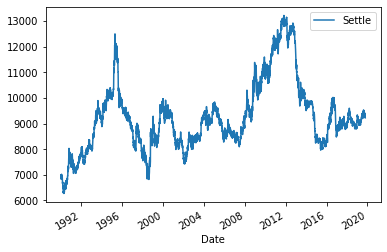

In [11]:
yen_settle  = pd.DataFrame(yen_futures["Settle"])
yen_settle.plot()

In [12]:
# Using a Hodrick-Prescott Filter, decompose the Settle price into a trend and noise.
import statsmodels.api as sm

In [13]:
yen_settle_noise, yen_settle_trend = sm.tsa.filters.hpfilter(yen_settle)
yen_settle["noise"] = yen_settle_noise
yen_settle["trend"] = yen_settle_trend
yen_settle.head()

,Settle,noise,trend
Date,,,
1990-01-02,6847.0,-61.503967,6908.503967
1990-01-03,6887.0,-21.799756,6908.799756
1990-01-04,7008.0,98.942896,6909.057104
1990-01-05,6950.0,40.776052,6909.223948
1990-01-08,6959.0,49.689938,6909.310062


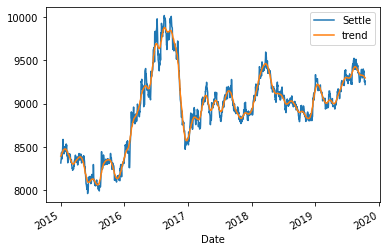

In [16]:
yen_settle_2015 = yen_settle.loc["2015-1-1":]
yen_settle_2015 = yen_settle_2015.drop("noise", axis=1)
yen_settle_2015.plot()

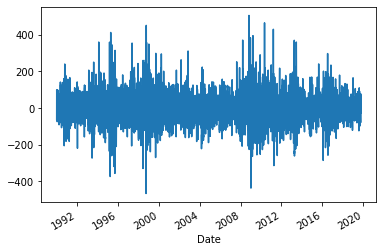

In [18]:
yen_settle["noise"].plot()

In [19]:
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [21]:
from statsmodels.tsa.arima_model import ARMA

In [22]:
model = ARMA(returns.values, order=(2,1))
results = model.fit()

In [23]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Fri, 13 Nov 2020   AIC                          15798.142
Time:                        11:47:28   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.421      -0.009       0.022
ar.L1.y       -0.3063      1.277     -0.240      0.810      -2.809       2.197
ar.L2.y       -0.0019      0.019     -0.099      0.9

AxesSubplot(0.125,0.125;0.775x0.755)


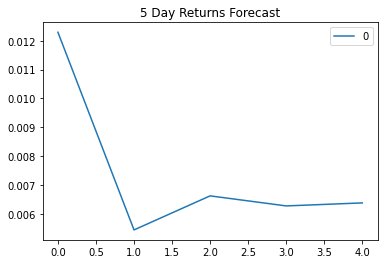

In [25]:
print(pd.DataFrame(results.forecast(steps=5)[0]).plot(title="5 Day Returns Forecast"))

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
model = ARIMA(yen_futures["Settle"], order=(5, 1, 2))
results = model.fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 7514
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -41944.316
Method:                       css-mle   S.D. of innovations             64.278
Date:                Fri, 13 Nov 2020   AIC                          83906.632
Time:                        11:48:23   BIC                          83968.953
Sample:                             1   HQIC                         83928.031
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3161      0.701      0.451      0.652      -1.057       1.689
ar.L1.D.Settle    -0.2554      0.502     -0.509      0.611      -1.239       0.729
ar.L2.D.Settle     0.2977      0.296      1.006      0.314      -0.282       0.878
ar.L3.D.Settle    -0.0101      0.014     -0.747      0.455      -0.037       0.016
ar.L4.D.Settle    -0.0219      0.015     -1.492      0.136      -0.051       0.007
ar.L5.D.Settle    -0.0003      0.017     -0.016      0.988      -0.034       0.033
ma.L1.D.Settle     0.2405      0.502      0.479      0.632      -0.743       1.224
ma.L2.D.Settle    -0.3051      0.291     -1.048      0.295      -0.876       0.266
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5234           -0.0000j            1.5234           -0.5000
AR.2            2.4648           -1.1771j            2.7315           -0.0709
AR.3            2.4648           +1.1771j            2.7315            0.0709
AR.4           -4.0442           -0.0000j            4.0442           -0.5000
AR.5          -80.6546           -0.0000j           80.6546           -0.5000
MA.1           -1.4587           +0.0000j            1.4587            0.5000
MA.2            2.2467           +0.0000j            2.2467            0.0000
-----------------------------------------------------------------------------
"""

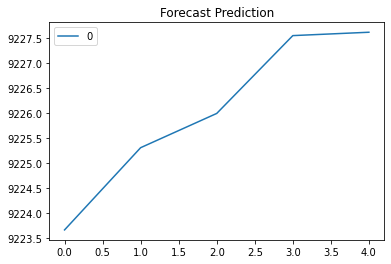

In [35]:
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Forecast Prediction")

In [36]:
from arch import arch_model

In [37]:
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)
results = model.fit(disp="off")

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14931.9
Method:            Maximum Likelihood   BIC:                           14959.6
                                        No. Observations:                 7514
Date:                Fri, Nov 13 2020   Df Residuals:                     7510
Time:                        11:49:47   Df Model:                            4
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2896e-03  2.057e-03      2.085  3.708e-02  [2.571e-04,8.322e-03]
alpha[1]       0.0381  1.282e-02      2.970  2.974e-03  [1.295e-02,6.321e-02]
alpha[2]       0.0000  1.703e-02      0.000      1.000 [-3.338e-02,3.338e-02]
beta[1]        0.9536  1.420e-02     67.135      0.000      [  0.926,  0.981]
=============================================================================

Covariance estimator: robust
"""

In [39]:
last_day = returns.index.max().strftime('%Y-%m-%d')
print(last_day)

2019-10-15


In [40]:
forecast_horizon = 5
forecasts = results.forecast(start=last_day, horizon=forecast_horizon)
forecasts

In [42]:
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate # Only one date!

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.434048,7.475745,7.516867,7.557426,7.597434


In [44]:
final = intermediate.dropna().T
print(final.head())

Date  2019-10-15
h.1     7.434048
h.2     7.475745
h.3     7.516867
h.4     7.557426
h.5     7.597434


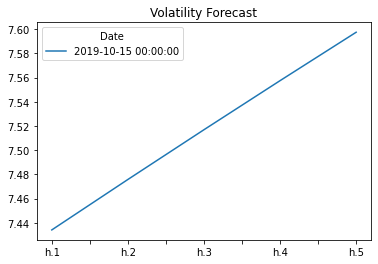

In [45]:
# Plot the forecast!
fig = final.plot(title="Volatility Forecast")